#  Binome : HAMAT - GLASS


# Clusturing

In [9]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


#  Clusturing avec KMeans

In [2]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)
pca=PCA(n_components =12)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.colors as mcolors


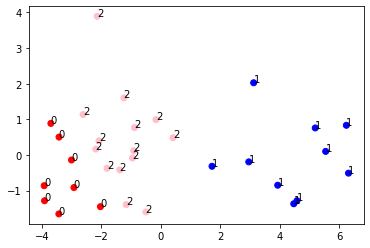

In [6]:
n_clusters = 3

clustering = KMeans(n_clusters, random_state=0).fit(Xnorm)
y_kmeans = clustering.predict(Xnorm)
colors = ['red','yellow','blue','pink']
labels = clustering.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y_kmeans, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#  Clustirung avec AgglomerativeClustering

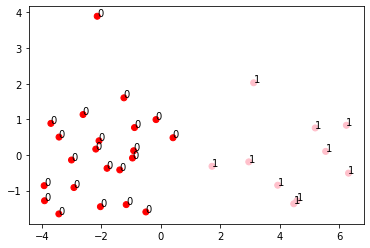

In [7]:
clustering = AgglomerativeClustering().fit(Xnorm)
y_predict = clustering.fit_predict(Xnorm)
labels = clustering.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y_predict, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#  Recherche de la meilleure partition KMeans

In [8]:
from sklearn import metrics
best_n_clusters =  0
max_score = -1
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X)
    score = metrics.silhouette_score(X, clustering,metric='euclidean')
    print(score)
    if(score > max_score):
        max_score = score
        best_n_clusters = i
print("meilleure partition :", best_n_clusters, "score obtenu", max_score)

0.6181156437258204
0.38578543985025826
0.33929564732229306
0.32075396348111507
meilleure partition : 2 score obtenu 0.6181156437258204
